<a href="https://colab.research.google.com/github/pragmatizt/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/ira_431_Intro_to_NN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
### Hidden Layer:
### Output Layer:
### Neuron:
### Weight:
### Activation Function:
### Node Map:
### Perceptron:


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [0]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [0]:
##### Your Code Here #####

df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [0]:
import numpy as np

In [0]:
inputs = np.array((df['x1'], df['x2']))

In [0]:
inputs

array([[0, 1, 0, 1],
       [0, 0, 1, 1]])

In [0]:
y = [df['y']]

In [0]:
y

[0    1
 1    1
 2    1
 3    0
 Name: y, dtype: int64]

In [0]:
inputs.shape[1]

4

In [0]:
weights = 2 * np.random.random((inputs.shape[1],1))-1
# weights 4

In [0]:
weights

array([[ 0.36321031],
       [-0.66841877],
       [-0.86386445],
       [ 0.59460497]])

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  sx = sigmoid(x)
  return sx * (1-sx)

In [0]:
weighted_sum = np.dot(inputs, weights) # because they are a matrix
weighted_sum

array([[-0.0738138 ],
       [-0.26925948]])

In [0]:
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.48155492],
       [0.4330889 ]])

In [0]:
error = y - activated_output
error

array([[ 0.51844508,  0.51844508,  0.51844508, -0.48155492],
       [ 0.5669111 ,  0.5669111 ,  0.5669111 , -0.4330889 ]])

In [0]:
adjusted = error * sigmoid_derivative(activated_output)
adjusted # increase by positive values, decrease by negative values

array([[ 0.12237836,  0.12237836,  0.12237836, -0.11367049],
       [ 0.13528431,  0.13528431,  0.13528431, -0.10334978]])

In [0]:
weights = np.dot(inputs.T, adjusted)
weights
# after

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.12237836,  0.12237836,  0.12237836, -0.11367049],
       [ 0.13528431,  0.13528431,  0.13528431, -0.10334978],
       [ 0.25766268,  0.25766268,  0.25766268, -0.21702026]])

In [0]:
# Update our weights 10,000 times - (fingers crossed that this process reduces error)
def perceptron_ira(inputs, weights, correct_outputs):
  for iteration in range(10000):
    # Weighted sum of inputs / weights
    bias = 2*np.random.random()-1
    weighted_sum = np.dot(inputs, weights) + bias

    # Activate!
    activated_output = sigmoid(weighted_sum)

    # Cac error
    error = correct_outputs - activated_output

    adjusted = error * sigmoid_derivative(activated_output)

    # update the weights
    weights += np.dot(inputs.T, adjusted)
    bias += np.mean(error)

  print("Weights after training")
  print(weights)

  print("Output after training")
  print(activated_output)

In [0]:
perceptron_ira(inputs, weights, y)

Weights after training
[[ 0.          0.          0.          0.        ]
 [ 3.17604532  3.17604532  3.17604532 -3.26055021]
 [ 3.17677193  3.17677193  3.17677193 -3.25999085]
 [ 6.35281725  6.35281725  6.35281725 -6.52054105]]
Output after training
[[9.99948771e-01 9.99948771e-01 9.99948771e-01 8.02153111e-05]
 [9.99948808e-01 9.99948808e-01 9.99948808e-01 8.02601899e-05]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [0]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [0]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [0]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

features = list(diabetes)[:-1]

In [0]:
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [0]:
y = diabetes['Outcome'].to_numpy() # Target value to numpy array
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [0]:
# MinMaxScaler: Transforms features by scaling each feature to a given range
# fit_transform(self, X[, y]) fit to data, then transform it.
# Normalizer: Normalize samples individually to unit norm
scaler = MinMaxScaler()
X = scaler.fit_transform(diabetes[feats])

In [0]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [0]:

##### Update this Class #####

class Perceptron(object):
    def __init__(self, rate=0.1, niter=10000):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Initialize Weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [0]:
import matplotlib.pyplot as plt

In [0]:
# train/test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

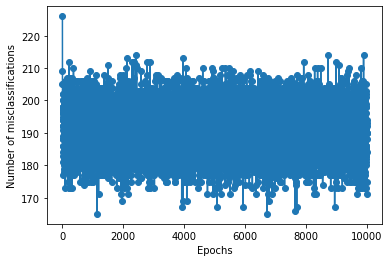

In [0]:
pn = Perceptron() 
pn.fit(X_train, y_train)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [0]:
predictions = [pn.predict(X_test[i]) for i in range(len(X_test))]
print("accuracy:", accuracy_score(y_test, predictions))

accuracy: 0.7662337662337663


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?